In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import kagglehub
import os
from IPython.display import Image, display
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [30]:
# Baixar o dataset do Kaggle
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)

# Carregar o arquivo CSV
csv_path = path + "/StudentsPerformance.csv"
df = pd.read_csv(csv_path)
df.head()

Path to dataset files: C:\Users\ediad\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


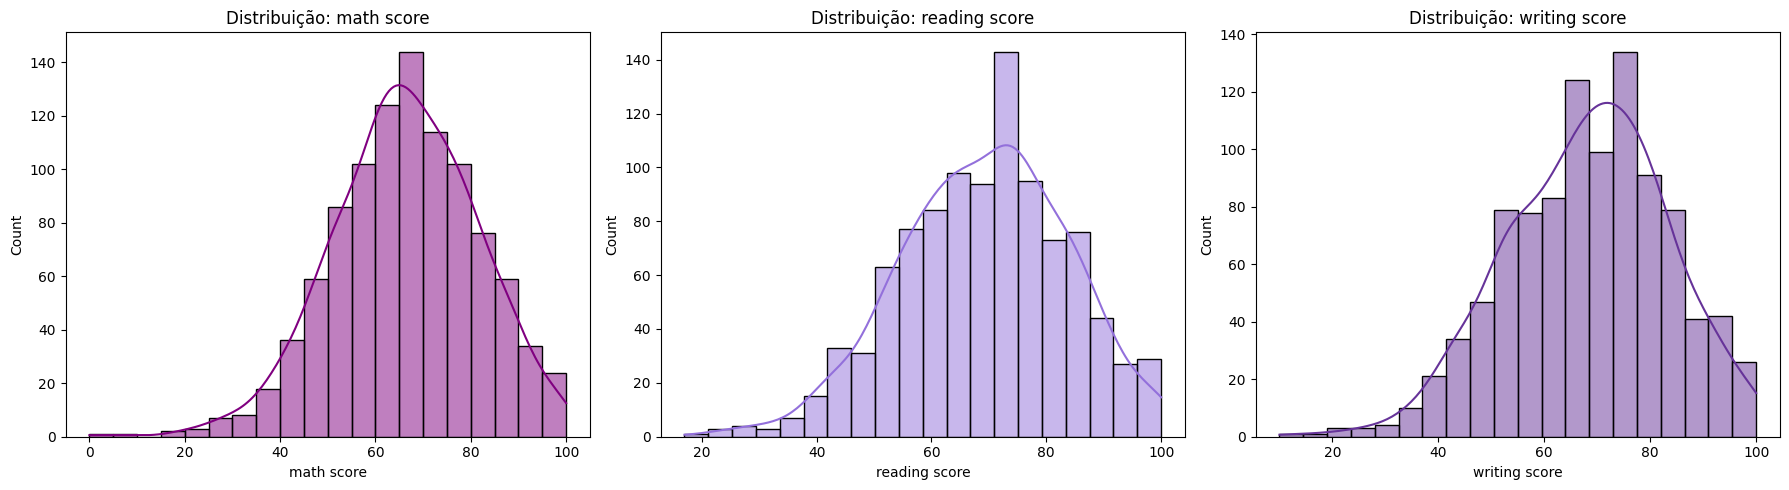

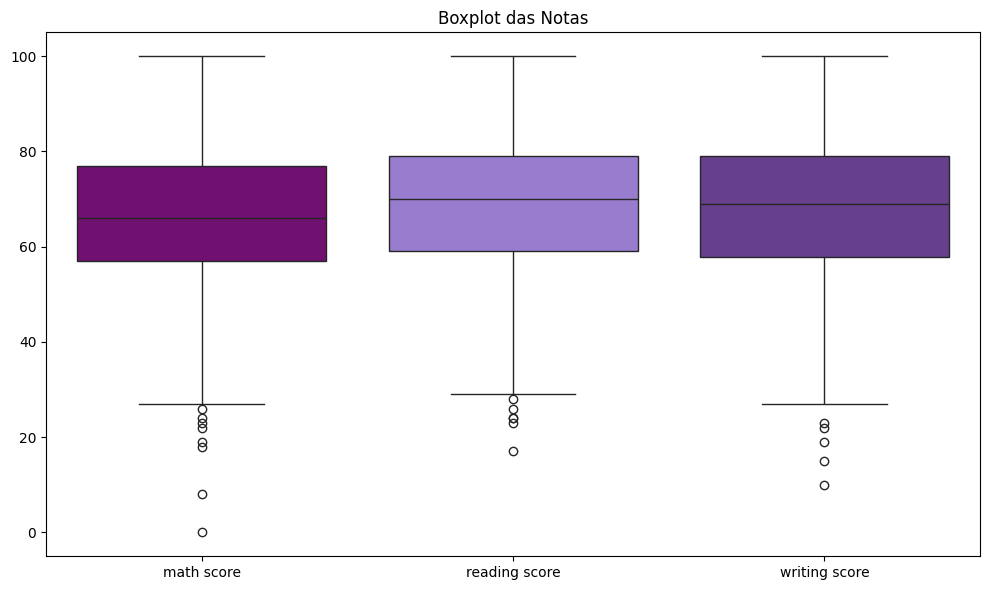

In [31]:
cores = ['purple', 'mediumpurple', 'rebeccapurple']

os.makedirs('imagens', exist_ok=True)

# Histogramas das notas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, col in enumerate(['math score', 'reading score', 'writing score']):
    sns.histplot(df[col], bins=20, ax=axes[idx], kde=True, color=cores[idx])
    axes[idx].set_title(f'Distribuição: {col}')
plt.tight_layout()
plt.savefig('imagens/histogramas_notas.png')
plt.show()
plt.close(fig) 

# Boxplot das notas
fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']], ax=ax2, palette=cores)
ax2.set_title('Boxplot das Notas')
plt.tight_layout()
plt.savefig('imagens/boxplot_notas.png')
plt.show()
plt.close(fig2)

In [32]:
print('Formato do dataset:', df.shape)
df.info()
print('\nValores nulos por coluna:')
print(df.isnull().sum())
print('\nEstatísticas das notas:')
print(df[['math score', 'reading score', 'writing score']].describe())

Formato do dataset: (1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Valores nulos por coluna:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score      

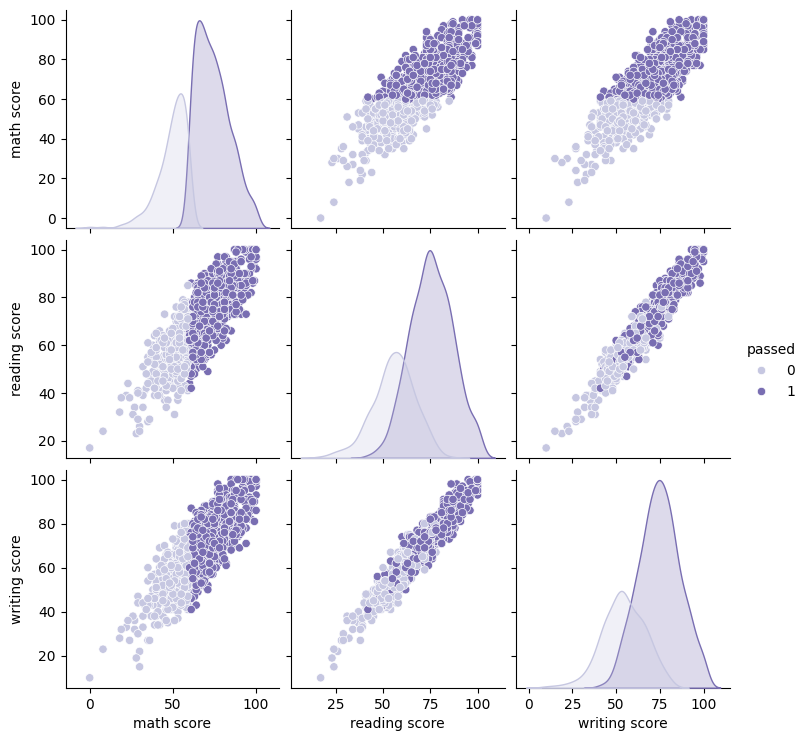

In [34]:
sns.pairplot(df, hue='passed', palette='Purples')
plt.savefig('imagens/pairplot_passed.png')
plt.show()


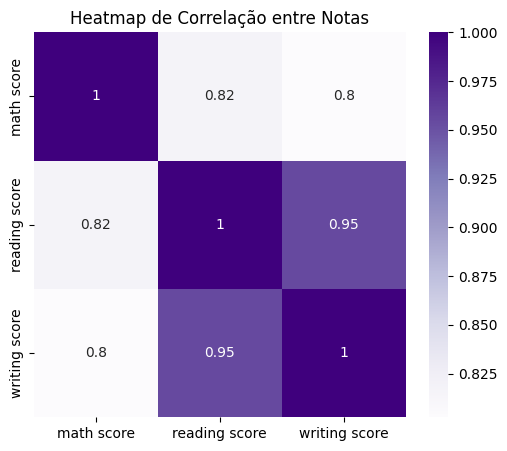

In [17]:
corr = df[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title('Heatmap de Correlação entre Notas')
os.makedirs('imagens', exist_ok=True)
plt.savefig('imagens/heatmap_correlacao_notas.png')
plt.show()

In [18]:
# Tratamento de valores ausentes
df = df.dropna()

# Codificação de variáveis categóricas
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Criar coluna alvo binária para classificação: passed (math score >= 60)
df['passed'] = (df['math score'] >= 60).astype(int)

# Selecionar features (exceto notas) e target
X = df.drop(['math score', 'reading score', 'writing score', 'passed'], axis=1)
y = df['passed']

# Normalização das features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Dados pré-processados (primeiras linhas)
print(df.head())

   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  passed  
0                        1          72             72             74       1  
1                        0          69             90             88       1  
2                        1          90             95             93       1  
3                        1          47             57             44       0  
4                        1          76             78             75       1  


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print('Formato treino:', X_train.shape, y_train.shape)
print('Formato teste:', X_test.shape, y_test.shape)

Formato treino: (700, 5) (700,)
Formato teste: (300, 5) (300,)


In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Arquivos knn_y_test.csv e knn_y_pred.csv salvos com sucesso!
Acurácia: 0.62
              precision    recall  f1-score   support

           0       0.44      0.30      0.35       105
           1       0.68      0.79      0.73       195

    accuracy                           0.62       300
   macro avg       0.56      0.55      0.54       300
weighted avg       0.59      0.62      0.60       300



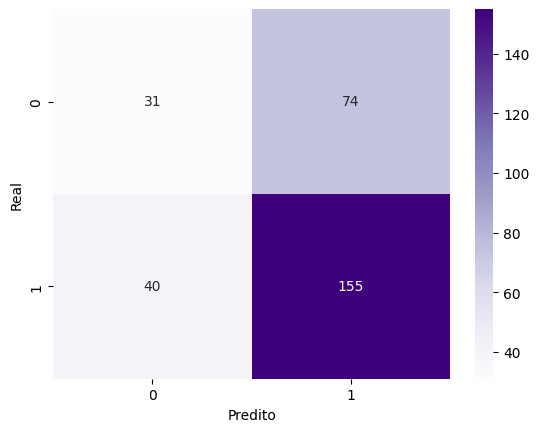

In [23]:
y_pred = knn.predict(X_test)

# Salvar resultados para avaliação de métricas em outro notebook
pd.DataFrame(y_test).to_csv('csv/knn_y_test.csv', index=False)
pd.DataFrame(y_pred).to_csv('csv/knn_y_pred.csv', index=False)
print('Arquivos knn_y_test.csv e knn_y_pred.csv salvos com sucesso!')

# Avaliação do modelo KNN
print('Acurácia:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
os.makedirs('imagens', exist_ok=True)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.savefig('imagens/matriz_confusao_knn.png')
plt.show()

C:\Users\ediad\AppData\Local\Temp\ipykernel_17832\4288332025.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='math score', data=df, ci=None, ax=ax, color='mediumpurple')


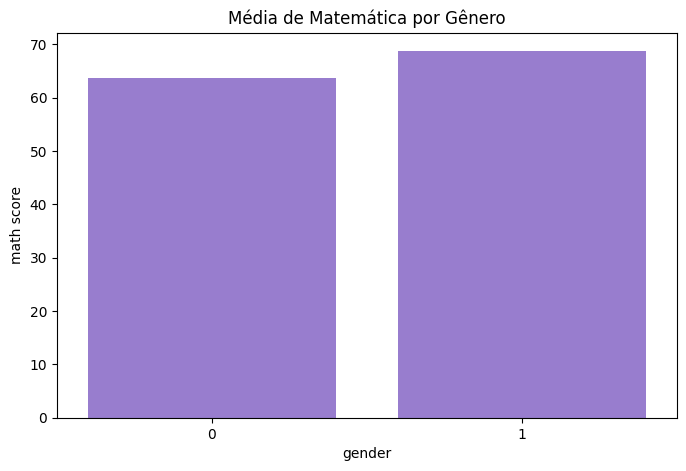

C:\Users\ediad\AppData\Local\Temp\ipykernel_17832\4288332025.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='race/ethnicity', y='math score', data=df, ci=None, ax=ax, color='rebeccapurple')


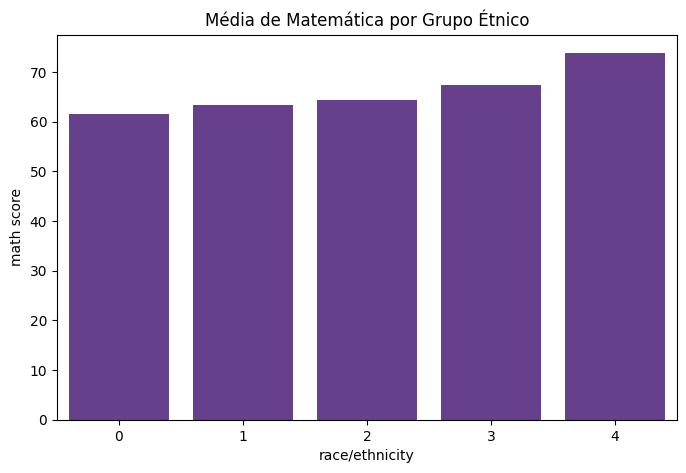

In [24]:
os.makedirs('imagens', exist_ok=True)

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='gender', y='math score', data=df, ci=None, ax=ax, color='mediumpurple')
plt.title('Média de Matemática por Gênero')
plt.savefig('imagens/barplot_genero.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='race/ethnicity', y='math score', data=df, ci=None, ax=ax, color='rebeccapurple')
plt.title('Média de Matemática por Grupo Étnico')
plt.savefig('imagens/barplot_etnia.png')
plt.show()


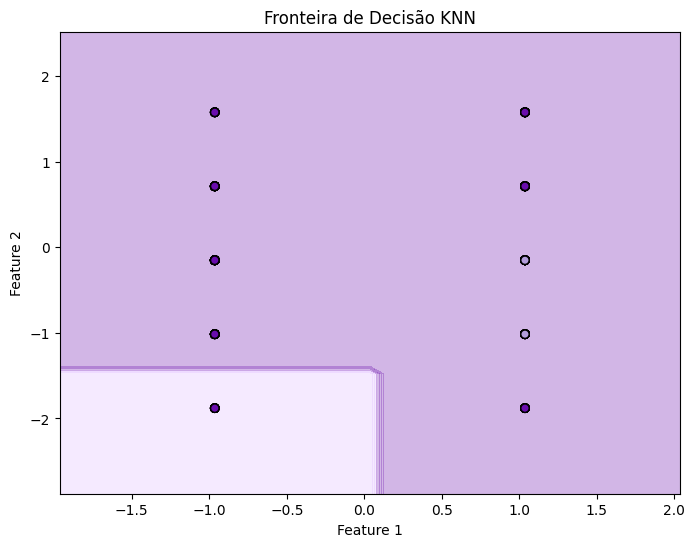

In [27]:
# Selecionar apenas as duas primeiras features para visualização
X_test_vis = X_test[:, :2]
X_train_vis = X_train[:, :2]
y_test_vis = y_test
y_train_vis = y_train

# Treinar um novo modelo KNN com apenas duas features
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

# Gerar o gráfico da fronteira de decisão
plot_decision_boundary(X_test_vis, y_test_vis, knn_vis)
